# Numerical exercises 01

From shell, inside _this_ directory:
- To compile: `make`
- To run the programs: `./execute.sh`

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, cauchy
import math

## Exercise 01.1: Test of a pseudo-random number generator

Pseudo-random numbers generation is central in any Monte Carlo application. In this exercise we test the pseudo-random number generator that we will use throughout the course.

### 1.1 Estimation, uncertainty and blocking method

We start probing the goodness of the PRNG by evaluating the mean value and the variance of random number from a uniform distribution in $[0,1)$. We expect: $\langle r \rangle = \int_0^1 r dr = 1/2$.

We use the blocking method: Given $M$ _throws_, we divide them in $N$ blocks; for each block we compute the mean value and its standard deviation; finally we average the estimation of the mean and compute the error value by considering progressively $i = 1, 2, ..., N$ blocks. The Central Limit Theorem guarantees that the best result for $i = 1, ..., N$ blocks will be given by the average of the values of the single blocks and the uncertainty will be given by the standard deviation of the average of the $i$ blocks.

As expected, the graph shows how the aproximation improves with the increasing number of the blocks considered. It is important to note that we have not proven that the numbers are extracted from a uniform distribution, but instead we have shown that the probabilityof them not being drawn from a uniform distribution is low.

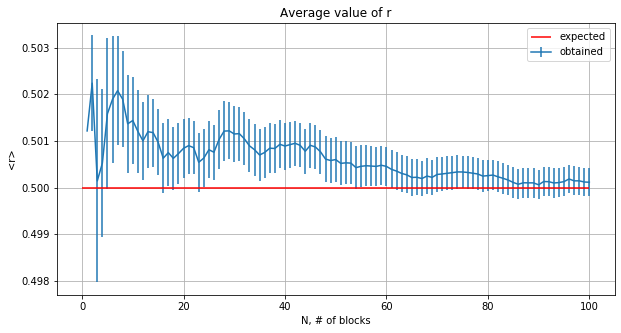

In [42]:
fig=plt.figure(figsize=(10,5))

N, r, error = np.loadtxt("ex1.1/results11.dat", usecols=(0,1,2), delimiter=" ", unpack=True)
plt.errorbar(N,r,yerr=error, label='obtained')
plt.xlabel('N, # of blocks')
plt.ylabel('<r>')
plt.title("Average value of r")
plt.hlines(0.5, 0, 100, color='red', label='expected')
plt.grid(True)
plt.legend()
plt.show()

### 1.2 Variance 

In the same way we estimate the variance: $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. The graph confirms once again our expectations.

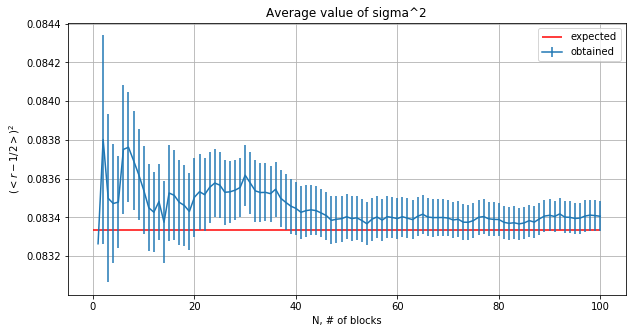

In [5]:
fig=plt.figure(figsize=(10,5))

N, r, error = np.loadtxt("ex1.1/results12.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.hlines(1./12, 0, 100, color='red', label='expected')
plt.errorbar(N,r,yerr=error, label='obtained')
plt.xlabel('N, # of blocks')
plt.legend()
plt.ylabel('$(<r-1/2>)^2$')
plt.title("Average value of sigma^2")
plt.grid(True)
plt.show()

### 1.3 The $\chi^2$ test

The last check that we  make is the $\chi^2$ test. We divide the interval $[0,1)$ in $N$ subintervals, we exctract $M$ random numbers from our uniform distribution, and we count the number of numbers that fall into each subinterval. We repeat the extraction $100$ times (with a different set of random numbers each time) and we calculate:
$$
\chi^2 =  \sum_{i=1}^{100} \frac{\left( O_i - E_i \right)^2}{E_i}
         = \sum_{i=1}^{100} \frac{\left( n_i - M/N \right)^2}{M/N},
$$
Where the expected value of observed events in each subinterval is, for a **uniform distribution**, $E_i=M/N$, and the observed events in each subinterval is $O_i=n_i$. The theoretical probability distribution for counting experiments is the [binomial distribution](https://mathworld.wolfram.com/BinomialDistribution.html), that yealds us $E_i=M/N$ (in fact the probability of an event to fall in a subinterval is $1/N$ and the number of trials is $M$) and the variance is $\sigma_i^2=M/N(1-1/N)$. We set $N=100$ so that $\sigma^2_i\simeq M/N = E_i$. It follows that for each iteration we should have: $\chi^2 = \sum_i^{100} 1 = 100$. 

We can see looking at our graph that the $\chi^2$ values are distributed around the mean value 100. 

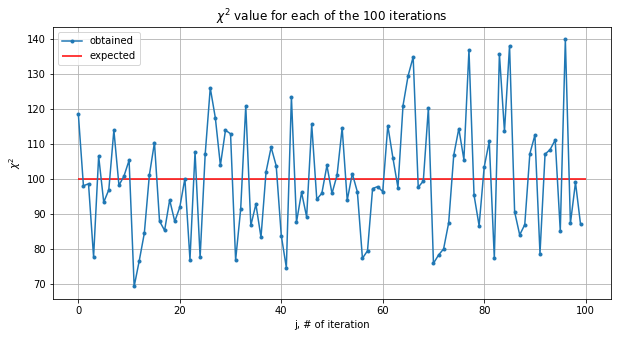

mean value =  99.66279999999999


In [8]:
chi =np.loadtxt("ex1.1/results13.dat", delimiter=' ', unpack=True)

fig=plt.figure(figsize=(10, 5))
plt.plot(chi, linestyle="-", marker=".", label='obtained')
plt.hlines(100, 0, 100, color='red', label='expected')
plt.xlabel('j, # of iteration')
plt.ylabel('$\chi^2$')
plt.legend()
plt.title('$\chi^2$ value for each of the 100 iterations')
plt.grid(True)
plt.show()
print("mean value = ", np.mean(chi))

## Exercise 01.2: Extension of the PRNG to check the CLT

The **Central Limit Theorem** states that when independent random variables are added together their normalized sum tends to a normal distribution, even if the variables are not themselves drawn from a normal distribuion (see [Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)). 

In this exercise our goal is to explore the consequences of CLT, that we enunciate below. 

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
For a given $N$, the sum of the independent and identically distributed random numbers $\{X_i\}_{i=1}^N$, with $\mu=\mathbb E[X_i]$, $Var[X_i]=\sigma^2 < \infty$ and $S_N= \frac{1}{N} \sum_{i=1}^N X_i$ converges in distribution to a normal distribution for $N \to \infty$:
$$
\sqrt{N}(S_N -\mu) \to \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{S_N -\mu}{\sigma}\big)^2}
$$
</p>

To observe the validity of CLT for different distributions we extend the class `Random` of our PRNG by adding methods to generate:
- an exponential distribution $p(x)=\lambda e^{-\lambda x},$ with $x \in [0, \infty)$;
- a Cauchy-Lorentz distribution $p(x) = \frac{1}{\pi} \frac{\Gamma}{(x-\mu)^2 + \Gamma^2}$, with $x \in (-\infty, \infty)$.

We obtain these two distributions using the method of **inversion of the cumulative distribuion**, defined as $F(x)=\int_0^x p(u)du$. By setting $y \equiv F(x)$ we invert $F$ and obtain: $x = F^{-1}(y)$. Our methods will work by drawing $y$ from a uniform distribution on $[0,1)$ and calculating $x$ using the inverse formula, which yealds $x = -\frac{1}{\lambda} \ln(1-y)$ for the exponential distribution and $x=\Gamma \tan\big( \pi(y - \frac{1}{2}) \big)+\mu$ for the Lorentzian distribution. Another possible implementation could have been achieved by using the accept-reject method.

In the case of a continuous distribution $f: X \to Y$, with $X,Y \in \mathbb R$, we have:
$$
\mathbb E[X] = \int_X x f(x) dx, \quad Var[X] = \int_X x^2 f(x) dx.
$$

We set the parameters as: $\lambda=1$, $\mu =0$, $\Gamma=1$. The variance, $Var[X] = \mathbb E[X^2] - \mathbb E[X]^2$, is then:
- $Var[X]=\sigma^2= 1/12$ for a uniform distribution on $[0,1)$;
- $Var[X]=1/\lambda^2=1$ for the exponential distribution;
- _not defined_ for the Cauchy-Lorentz distribution.

It is clear that the last case does not fulfill the hypothesis of the CLT: the Cauchy-Lorentz distribution is itself an attractor in the distribution space because of its [stability](https://en.wikipedia.org/wiki/Stable_distribution). 

The graphs below are obtained by drawing for $M=10^4$ times $N=1,2, 10, 100$ random numbers and by filling the histograms for $S_N$. 
We can observe the results we expect in the plots, where in the case for $N=100$ we also show the fit of our data (orange line). The lorentzian case exhibits the expected behaviour as well: for any $N$ the distribution of $S_N$ is the lorentzian distribution itself.

Gaussian fit: 
 mean =  0.5000108001 
 std dev =  0.029037794697737294


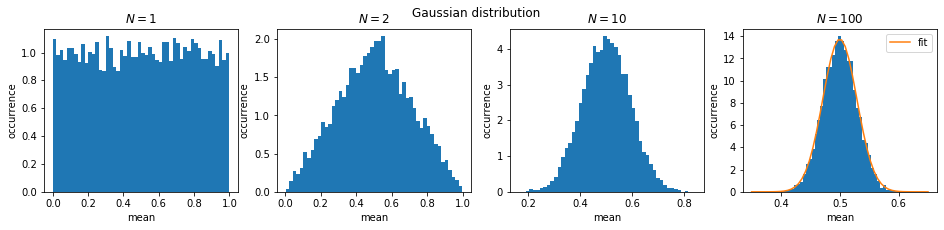

In [35]:
M=10000
graf= '1', '2', '10', '100'

fig=plt.figure(figsize=(16, 3))
plt.suptitle('Gaussian distribution')

for i in range(4):
    gaus = np.loadtxt("ex1.2/results21.dat", skiprows=i*M, max_rows=M, unpack= True)
    plt.subplot(1,4,i+1)
    plt.hist(gaus,50, density=True)
    plt.title(r'$N='+graf[i]+'$')
    plt.xlabel('mean')
    plt.ylabel('occurrence')
    plt.grid(False)
    if i==3 :
        parameter = norm.fit(gaus) 
        x = np.linspace(0.35, 0.65, 50) 
        y = norm.pdf(x, *parameter) 
        plt.plot(x, y, label='fit')
        plt.legend()

mu, std = norm.fit(gaus)

print("Gaussian fit: \n mean = ", mu, "\n std dev = ", std)

plt.show()

Gaussian fit: 
 mean =  0.9998264965999999 
 std dev =  0.09851158906206817


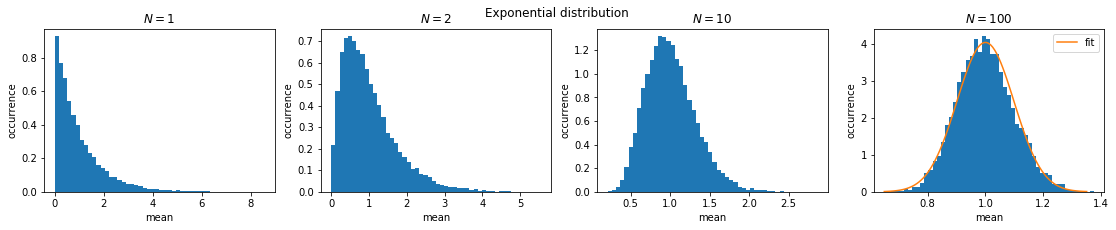

In [33]:
fig=plt.figure(figsize=(16, 3))
plt.suptitle('Exponential distribution')

for i in range(4):
    exp = np.loadtxt("ex1.2/results22.dat", skiprows=i*M, max_rows=M, unpack= True)
    plt.subplot(1,4,i+1)
    plt.hist(exp,50, density=True)
    plt.title(r'$N='+graf[i]+'$')
    plt.xlabel('mean')
    plt.ylabel('occurrence')
    plt.grid(False)
    if i==3 :
        parameter = norm.fit(exp) 
        x = np.linspace(0.65, 1.35, 100) 
        y = norm.pdf(x, *parameter)
        plt.plot(x, y, label='fit')
        plt.legend()

mu, std = norm.fit(exp)

print("Gaussian fit: \n mean = ", mu, "\n std dev = ", std)

plt.show()

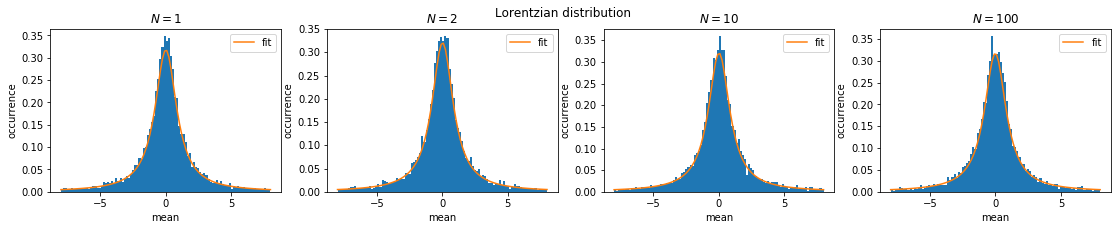

In [34]:
fig=plt.figure(figsize=(16, 3))
plt.suptitle('Lorentzian distribution')

for i in range(4):
    lor = np.loadtxt("ex1.2/results23.dat", skiprows=i*M, max_rows=M, unpack= True)
    plt.subplot(1,4,i+1)
    plt.hist(lor,100, range=(-8,8), density=True)
    plt.title(r'$N='+graf[i]+'$')
    plt.xlabel('mean')
    plt.ylabel('occurrence')
    plt.grid(False)
    parameter = cauchy.fit(lor) 
    x = np.linspace(-8, 8, 100)
    y = cauchy.pdf(x, *parameter)
    plt.plot(x, y, label='fit')
    plt.legend()

plt.show()

## Exercise 01.3: Simulation of Buffon's experiment

[Buffon's needle problem](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem#cite_note-vMaanen2018-6) allows to get a Monte Carlo estimate of the value of $\pi$. In fact the probability that a needle of length $L$ thrown on an orizontal plane ruled with parallel lines $d>L$ apart one from another is $P=2L/\pi d = N/M$, where $N$ is the number of intersections with the lines, $M$ is the number of total throws. We get the estimate from:
$$
\pi = \lim_{M\to \infty} \frac{2LM}{Nd}
$$
To perform the simulation it would suffice us to have two parameters: the position of the baricenter $(x,y)$ of the needle (the medium point of the stick in our case) drawn from a uniform distribution on $[0,d)$, and the orientation angle $\theta$, drawn from a uniform distribution on $[0,\pi)$. But we want to avoid to use $\pi$ to get our estimated value of $\pi$:
- We randomly choose $x, y \in [0,d)$;
- $\theta= \arccos \big(\frac{x}{x^2+y^2} \big)$, where we only keep the points generated within a unit semicircle in order to compute the uniform distribution between $[0,\pi)$.
Once we have the parameters, again through an extension of the `Random` class of our PRNG, we check if there is an intersection with the lines or not, and update the counters consequently.

The graph shows the improvement of the estimate the more intervals are considered, again with the blocking method. As before, we have in total $M =10^5$ random variables, drawn from a uniform distribution  and divided in $N=100$ blocks, and we show the increasing precision gained with the increase in the blocks considered for our estimate.

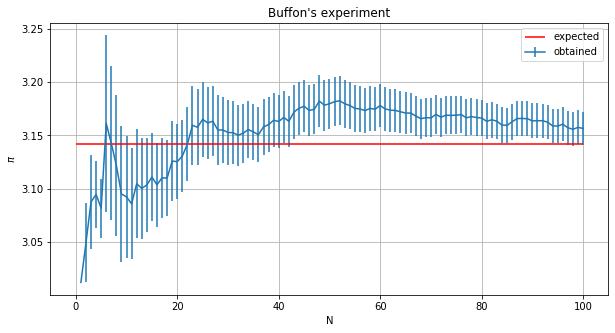

In [41]:
x,y,err=np.loadtxt("ex1.3/results3.dat",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(10, 5))
plt.errorbar(x,y,yerr=err, label='obtained')
plt.hlines(3.1415926, 0, 100, color='red', label='expected')
plt.xlabel('N')
plt.ylabel('$\pi$', )
plt.grid(True)
plt.title("Buffon's experiment")
plt.legend()
plt.show()